# Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
!pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.8 MB/s eta 0:00:00


# DATA SET 1

In [ ]:
# Sample Crops
offset = 254
cutoff = 120000 - offset

In [ ]:
path = "/content/drive/MyDrive/Data/OpenBCISession_2024-02-22_20-10-36/OpenBCI-RAW-2024-02-22_20-13-29.txt"
df = pd.read_csv(path, delimiter = ',', skiprows=offset, nrows=cutoff)
data = df.to_numpy()

## Preprocessing

In [ ]:
sfreq = 250  # sample rate in Hz
#data = np.delete(data, [12, 13, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
data = data[:, :-1] # removes timestamps
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=24, n_times=119746
    Range : 0 ... 119745 =      0.000 ...   478.980 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Using matplotlib as 2D backend.


<ipython-input-7-c56f085ae072>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-7-c56f085ae072>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


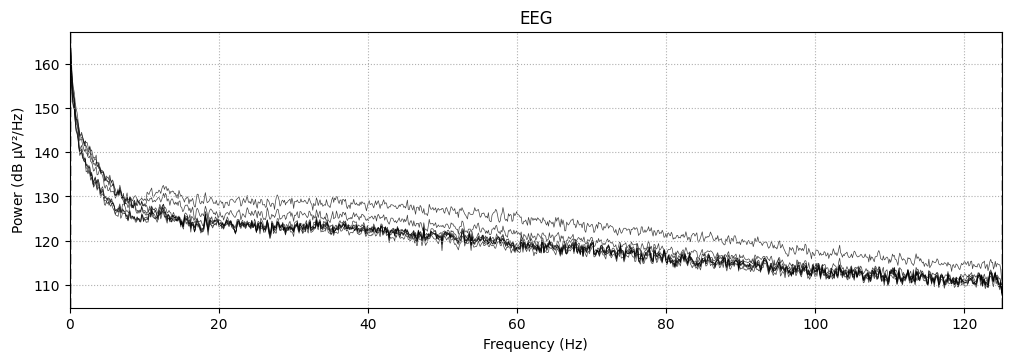

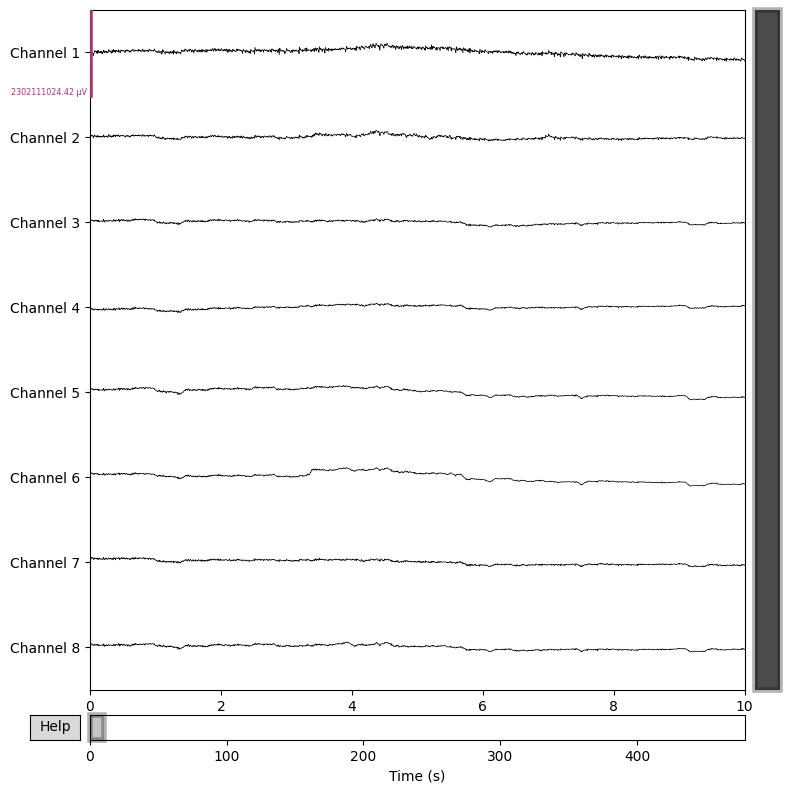

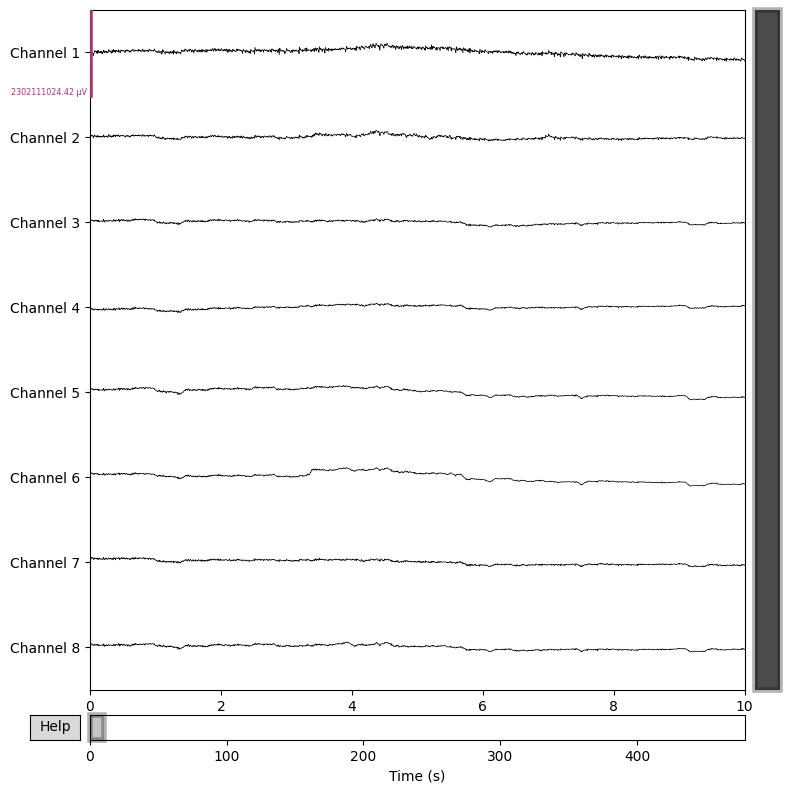

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
#print(raw.get_data())
raw.plot_psd()
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge

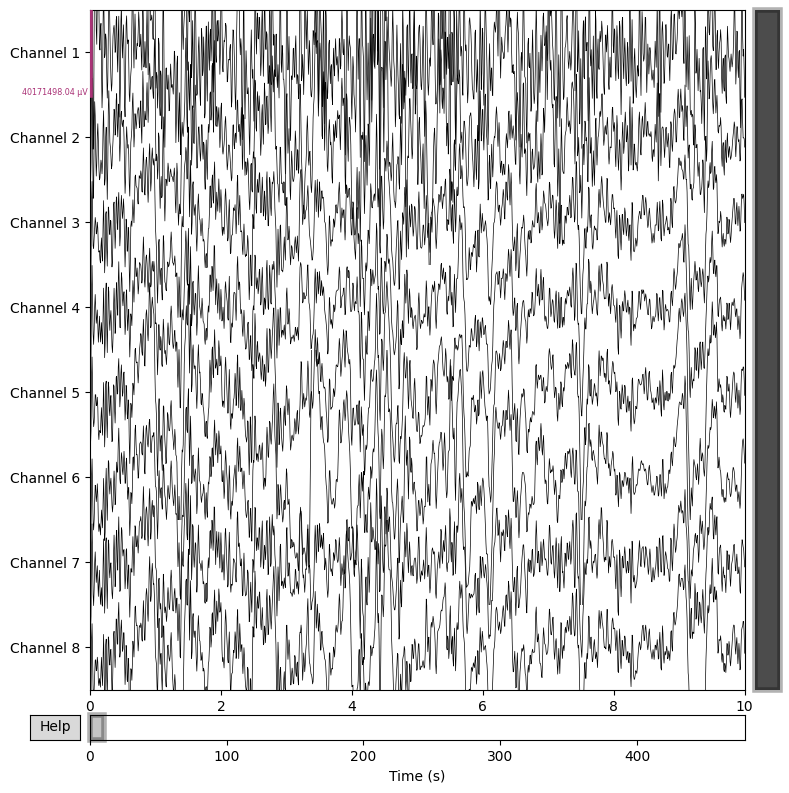

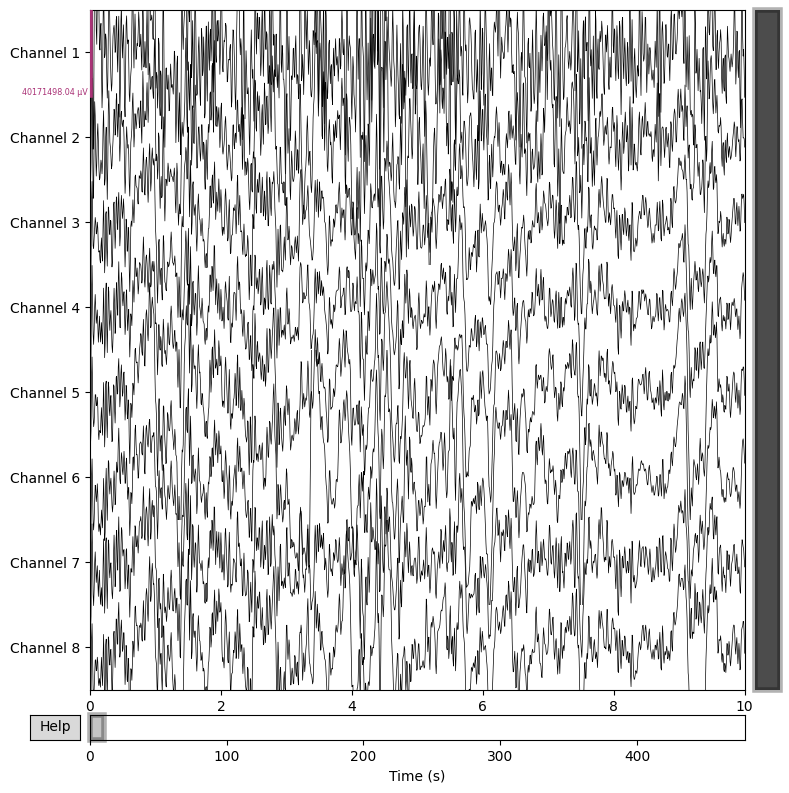

In [ ]:
# Time to start filtering
# 60hz electrical filter
raw.notch_filter(60)

# Research said filter to alpha/beta waves
raw.filter(l_freq=2, h_freq=30)

#raw.plot_psd()
raw.plot(scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


<ipython-input-9-a5fcf744740b>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-9-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


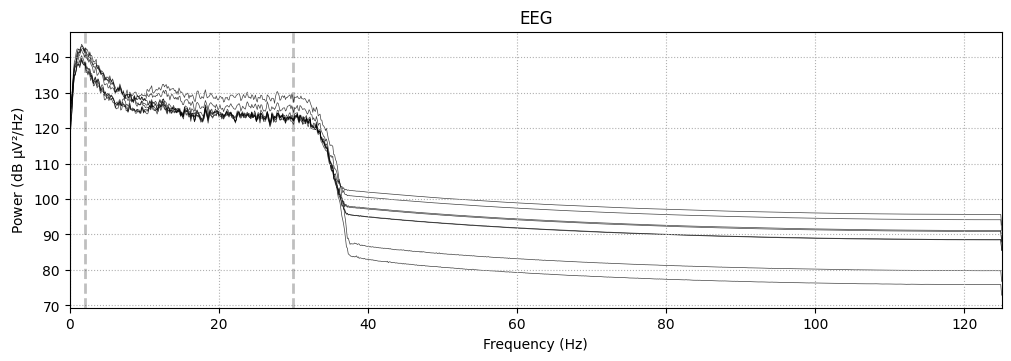

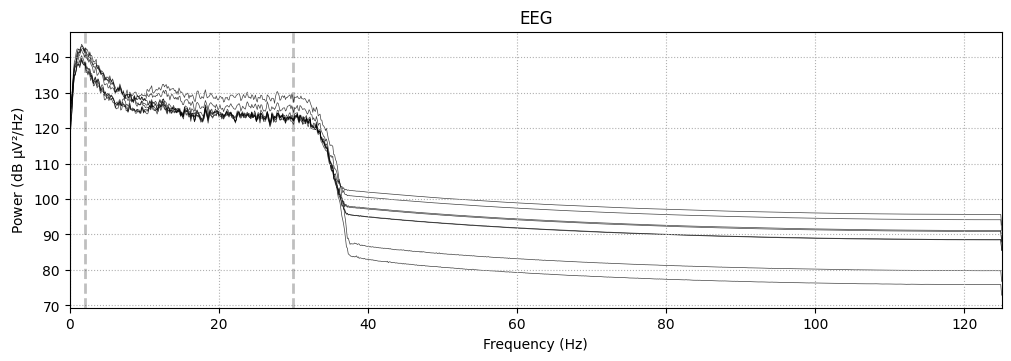

In [ ]:
raw.plot_psd()

## Feature Classification

In [ ]:
# Add a Row for Classification of Focus/Unfocus
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)

In [ ]:
list_of_times = [[1, 480]]

for interval in list_of_times:
  interval[0] = interval[0] * sfreq - offset
  interval[1] = interval[1] * sfreq - offset

for interval in list_of_times:
  for i in range(interval[0], interval[1]):
    if i >= cutoff:
      break
    filteredData[8, i] = 1

In [ ]:
for i in range(99*sfreq - offset, 111*sfreq - offset):
  print(filteredData[8, i])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


# DATA SET 2

In [ ]:
# Sample Crops
offset = 9 * 250

In [ ]:
path = "/content/drive/MyDrive/Data/OpenBCISession_2024-02-22_20-40-10/OpenBCI-RAW-2024-02-22_20-44-52.txt"
df = pd.read_csv(path, delimiter = ',', skiprows=offset)
data = df.to_numpy()

## Preprocessing

In [ ]:
sfreq = 250  # sample rate in Hz
#data = np.delete(data, [12, 13, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
data = data[:, :-1] # removes timestamps
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [ ]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=24, n_times=195788
    Range : 0 ... 195787 =      0.000 ...   783.148 secs
Ready.


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


<ipython-input-17-c56f085ae072>:7: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-17-c56f085ae072>:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


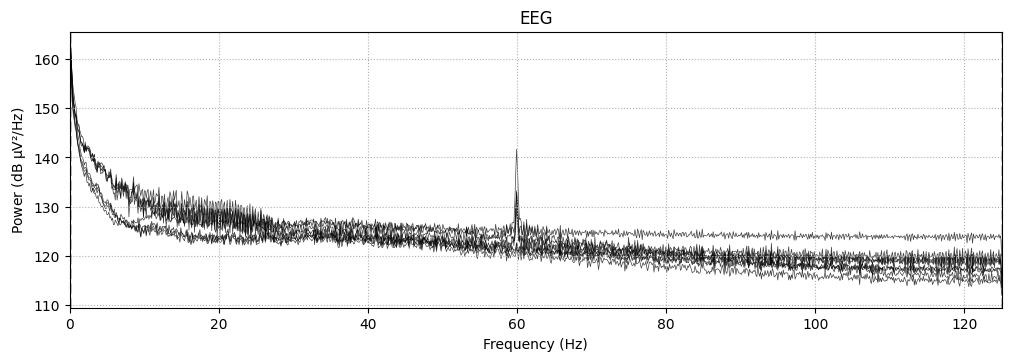

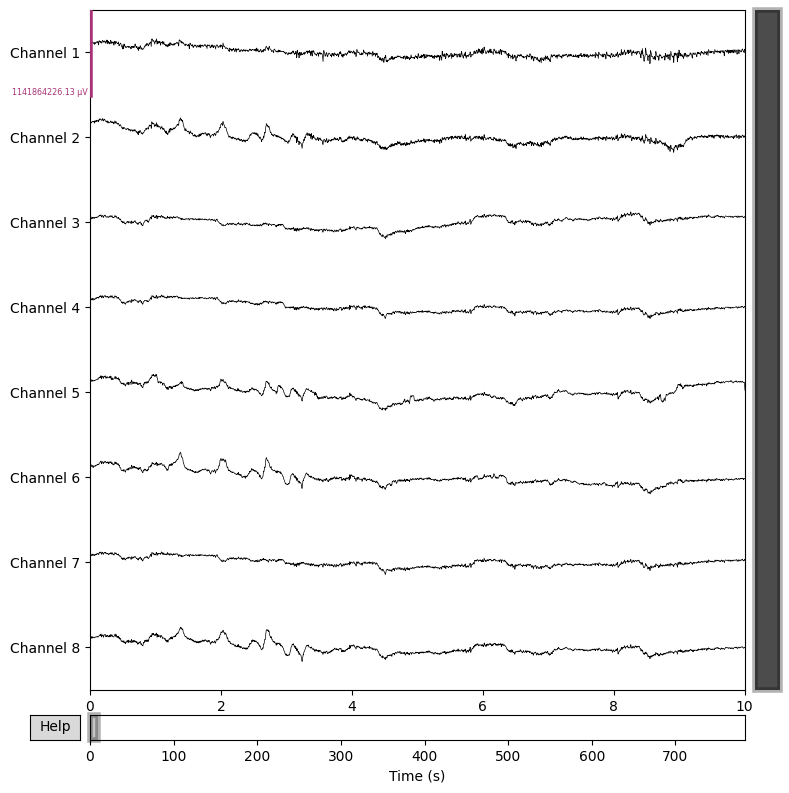

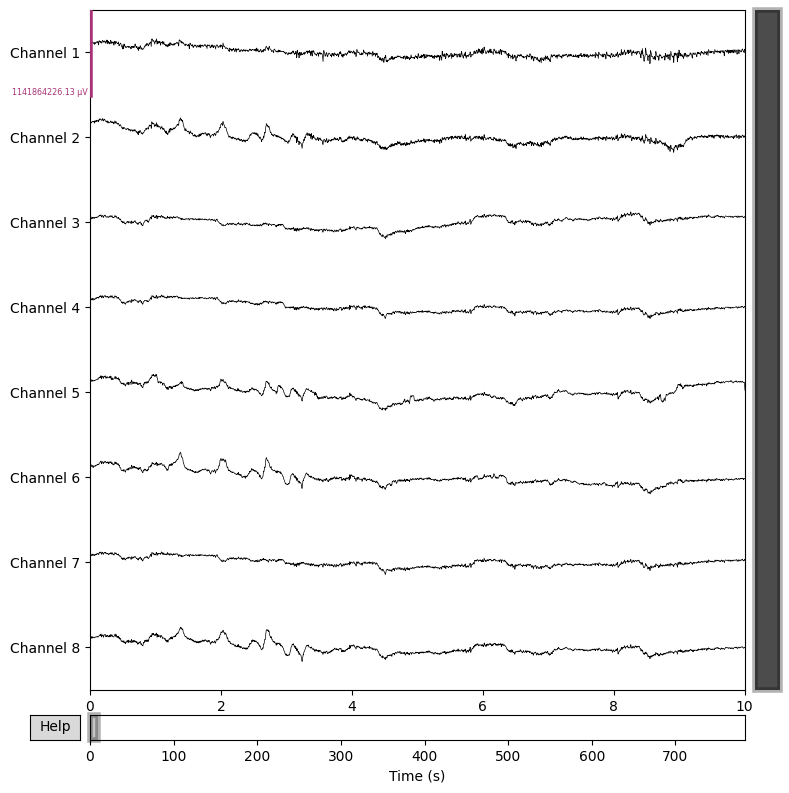

In [ ]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
#print(raw.get_data())
raw.plot_psd()
raw.plot(scalings='auto')

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 2 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 2.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Upper passband edge

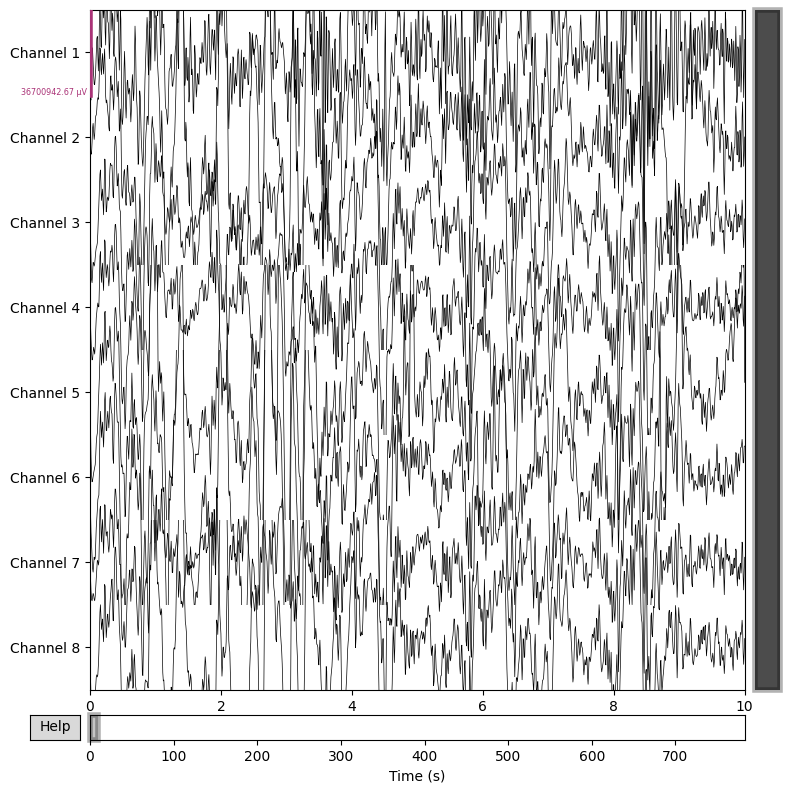

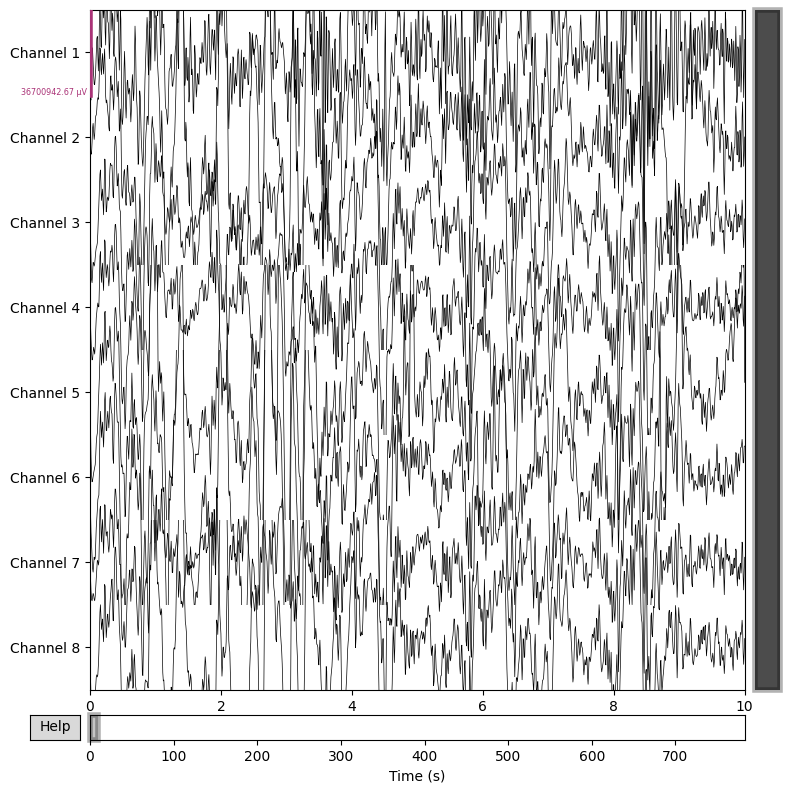

In [ ]:
# Time to start filtering
# 60hz electrical filter
raw.notch_filter(60)

# Research said filter to alpha/beta waves
raw.filter(l_freq=2, h_freq=30)

#raw.plot_psd()
raw.plot(scalings='auto')

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


<ipython-input-19-a5fcf744740b>:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
<ipython-input-19-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


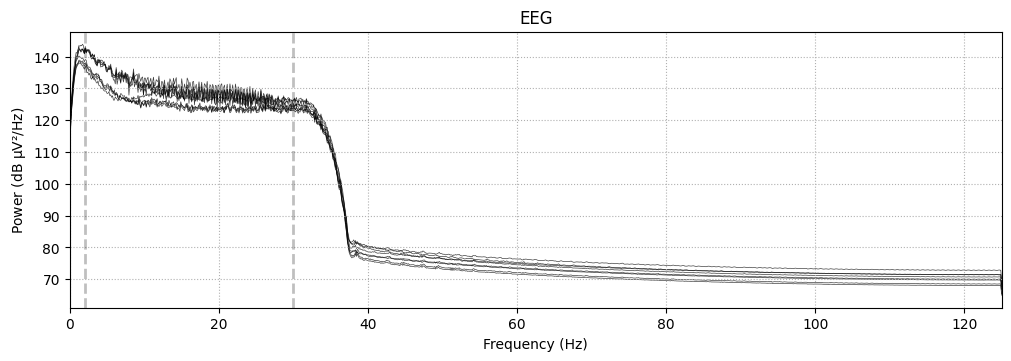

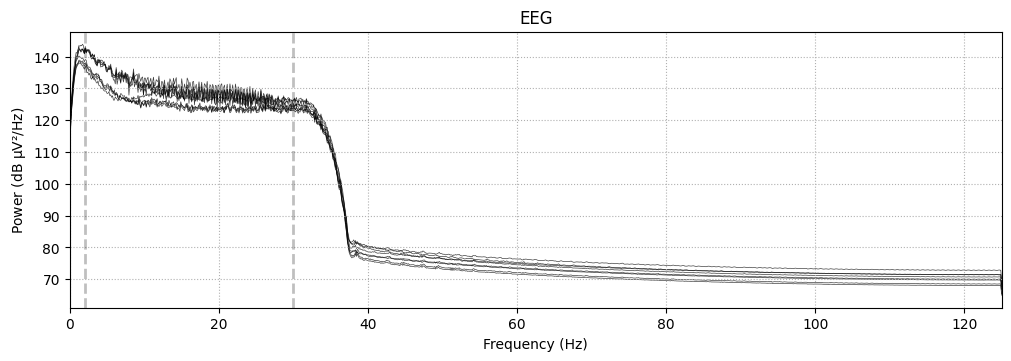

In [ ]:
raw.plot_psd()

## Feature Classification

In [ ]:
# Add a Row for Classification of Focus/Unfocus
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)

In [ ]:
list_of_times = [[1, 480]]

for interval in list_of_times:
  interval[0] = interval[0] * sfreq - offset
  interval[1] = interval[1] * sfreq - offset

for interval in list_of_times:
  for i in range(interval[0], interval[1]):
    if i >= cutoff:
      break
    filteredData[8, i] = 1

In [ ]:
for i in range(99*sfreq - offset, 111*sfreq - offset):
  print(filteredData[8, i])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
filteredData

array([[-4.39204229e-13, -1.18571252e+01, -2.03068755e+01, ...,
         1.22967735e+01,  6.10759172e+00, -1.63957736e-12],
       [ 1.62270197e-12, -2.23415863e+00, -4.31270831e+00, ...,
        -8.38535618e+00, -5.82159345e+00,  7.56728014e-13],
       [ 1.07469589e-12, -2.87481802e+00, -6.42052343e+00, ...,
         2.65923419e+00,  1.49379005e+00,  4.65405492e-13],
       ...,
       [-1.84030569e-12, -3.42165302e+00, -6.74227772e+00, ...,
         4.10247342e+00,  2.68488441e+00, -1.62536651e-12],
       [ 1.11199938e-12, -6.58905294e+00, -1.26070579e+01, ...,
        -4.15817966e+00, -2.54177150e+00,  5.15143483e-12],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]])